# Support Vector Machines (SVM's)

## Resources

* [Towards Data Science Article](https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878)

## Import Libraries

In [125]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Helper Methods

In [145]:
def print_null_values(df):
    count = df.isna().sum().sum()
    percent = round(df.isna().sum().sum() / df.size * 100, 1)
    
    print("--Null Values--")
    print(f'Total Null Values: {count} / {df.size}')
    print(f'Percent Null Values: %{percent}')
    print("")
    print("--Null Values per Feature--")
    print(df.isna().sum())
    
def print_correlation_matrix(df, target):
    print(df.corrwith(df[target]).sort_values(ascending=False))
    plt.figsize(20,12)
    return sns.heatmap(df.corr(), annot=True)

def measure_model_accuracy(y_test, predictions):
    from sklearn.metrics import classification_report, confusion_matrix

    print("Confusion Matrix:")
    print('\n')
    print(confusion_matrix(y_test, predictions))
    print('\n')
    print("Classification Report:")
    print('\n')
    print(classification_report(y_test, predictions))

## 1. Frame the Problem

We want to predict where a tumor is malignant or benign based on the features.

## 2. Load the Data

In [60]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [104]:
cancer.keys()
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [105]:
df_features = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_target = pd.Series(cancer['target'], name="malignant")

df = pd.concat([df_features, df_target], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [91]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [80]:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
df_features.shape

(569, 30)

In [82]:
df_features.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [83]:
print_null_values(df_features)

--Null Values--
Total Null Values: 0 / 17070
Percent Null Values: %0.0

--Null Values per Feature--
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


## 3. EDA (Explore & Visualize)

In [127]:
print_correlation_matrix(df, 'malignant')

malignant                  1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

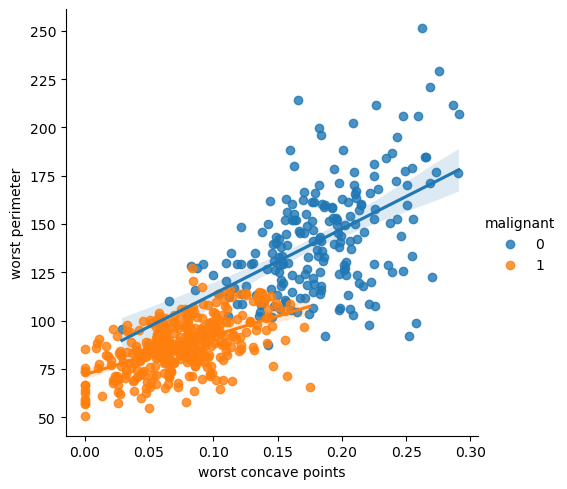

In [118]:
sns.lmplot(x="worst concave points", y="worst perimeter", hue="malignant", data=df)

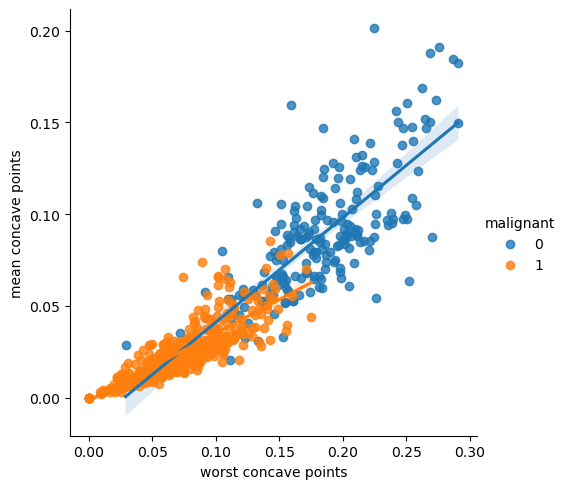

In [119]:
sns.lmplot(x="worst concave points", y="mean concave points", hue="malignant", data=df)

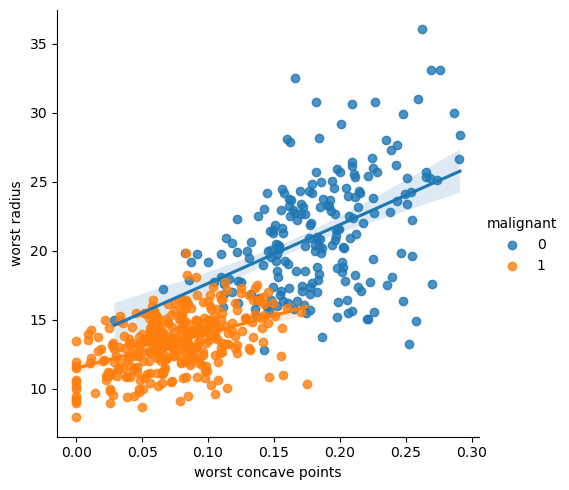

In [120]:
sns.lmplot(x="worst concave points", y="worst radius", hue="malignant", data=df)

## 4. Prepare the Data

In [71]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [135]:
from sklearn.model_selection import train_test_split

X = df_features
y = cancer["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Select, Train & Evalute Models


In [148]:
# Create & Train Model

from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

predictions = svc.predict(X_test)

measure_model_accuracy(y_test, predictions)

Confusion Matrix:


[[ 52  11]
 [  0 108]]


Classification Report:


              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



## 6. Fine Tune Models

### Perform Grid Search

Find best combination of parameters to use in model

In [150]:
from sklearn.model_selection import GridSearchCV

param_grid ={ 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001] }
# param_grid = [
#     {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
#     {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
# ]

model = SVC()

grid_search = GridSearchCV(model, param_grid, verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.620 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.620 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.625 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 1/5] END ................C=1000, gamma=0.01;, score=0.625 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.625 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.637 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.646 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.620 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.925 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.925 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.912 total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.873 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.873 total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 2/5] END ..............C=1000, gamma=0.0001;, score=0.912 total time=   0.0s
[CV 3/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [152]:
grid_search.best_params_

{'C': 100, 'gamma': 0.0001}

In [154]:
grid_search.best_estimator_

SVC(C=100, gamma=0.0001)

In [158]:
grid_search_predictions = grid_search.predict(X_test)

measure_model_accuracy(y_test, grid_search_predictions)

Confusion Matrix:


[[ 57   6]
 [  2 106]]


Classification Report:


              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

